# <font color=898AC4> **Telecom X - Análisis de Evasión de Clientes 2**
---

## <font color=C0C9EE> 🛠️ 1. Preparación de los datos

### <font color=C0C9EE> 1.1 Carga de datos

In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/lMVPl/analisis-evasion-de-clientes-2/refs/heads/main/datos-limpios_evasion-clientes.csv"

data = pd.read_csv(url)

data.head()

,customerID,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,gender_Male,customer.Partner_Yes,customer.Dependents_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,0,-0.951682,0.027862,-0.744026,0.031231,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,0,-0.951682,-0.161583,-0.766482,-0.158198,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,-1.155283,0.303720,-0.881874,0.300419,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1,1,-0.788800,1.104706,-0.459662,1.107982,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1,1,-1.196004,0.636080,-0.887808,0.639396,0,1,0,...,0,1,0,0,0,0,1,0,0,1


### <font color=C0C9EE> 1.2 Eliminación de columnas irrelevantes

In [37]:
data = data.drop(columns=['customerID'])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer.SeniorCitizen                         7043 non-null   int64  
 2   customer.tenure                                7043 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7043 non-null   float64
 5   cuentas_diarias                                7043 non-null   float64
 6   gender_Male                                    7043 non-null   int64  
 7   customer.Partner_Yes                           7043 non-null   int64  
 8   customer.Dependents_Yes                        7043 non-null   int64  
 9   phone.PhoneService_Yes                         7043 

In [39]:
data.head(5)

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,-0.951682,0.027862,-0.744026,0.031231,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0,0,-0.951682,-0.161583,-0.766482,-0.158198,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,0,-1.155283,0.303720,-0.881874,0.300419,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,1,1,-0.788800,1.104706,-0.459662,1.107982,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,1,1,-1.196004,0.636080,-0.887808,0.639396,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1


### <font color=C0C9EE> 1.3 Encoding

Anteriormente ya se realizó el One-Hot Encoding transformando las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning, a continuación se muestra el paso realizado en el proyecto anterior:



```
# Columnas categóricas a las que aplicaremos One-Hot Encoding
# Excluimos 'customerID' ya que es un identificador único y no una característica.
# Excluimos 'Churn' por ahora, ya que es tu variable objetivo y la trataremos por separado si es necesario.

categorical_cols = [
    'gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_flat, columns=categorical_cols, drop_first=True, dtype=int)

# 'drop_first=True' evita la multicolinealidad al eliminar una de las categorías (ej. si es 'male', no es 'female')
# 'dtype=int' asegura que las nuevas columnas sean enteros (0 o 1)

print("Primeras filas del DataFrame después de One-Hot Encoding:")
print(df_encoded.head())
print("\nNuevas columnas creadas por One-Hot Encoding:")
print([col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_cols)])
```



### <font color=C0C9EE> 1.4 Verificación de la proporción de cancelación (Churn)

El término "churn" se refiere a la tasa de cancelación o abandono de clientes en un período determinado.

In [40]:
# Conteo absoluto de cada clase
print("Conteo de clases:")
print(data['Churn'].value_counts())

# Proporción relativa (porcentaje)
print("\nProporción de clases:")
print(data['Churn'].value_counts(normalize=True))

Conteo de clases:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción de clases:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64




> Como se puede observar hay un 26.6% de clientes cancelaron, y el 73.4% se mantuvieron. Este tipo de desbalance (alrededor de 75/25) es moderado y puede requerir ajustes en modelos como:
- Usar técnicas de reescalado de clases (SMOTE, submuestreo, etc.)
- Aplicar pesos de clase en modelos como RandomForest, LogisticRegression, etc.



### <font color=C0C9EE> 1.5 Balanceo de clases

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Paso 1: Separar características (X) y objetivo (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Paso 2: Dividir en conjunto de entrenamiento y prueba antes del SMOTE (buena práctica)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 3: Aplicar SMOTE SOLO al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Paso 4: Verificar el nuevo balance
print("Después de SMOTE (entrenamiento):")
print(y_train_smote.value_counts())

Después de SMOTE (entrenamiento):
Churn
0    4139
1    4139
Name: count, dtype: int64


### <font color=C0C9EE> 1.6 Normalización o estandarización (si es necesario)

## <font color=C0C9EE> 🎯 2. Correlación y selección de variables

### <font color=C0C9EE> 2.1 Análisis de correlación

In [42]:
# Calculamos la matriz de correlación completa
corr_matrix = data.corr(numeric_only=True)

# Correlaciones con 'Churn', ordenadas de mayor a menor relación
correlacion_churn = corr_matrix['Churn'].sort_values(ascending=False)
print(correlacion_churn)

Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
cuentas_diarias                                  0.193412
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
gender_Male                                     -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partn

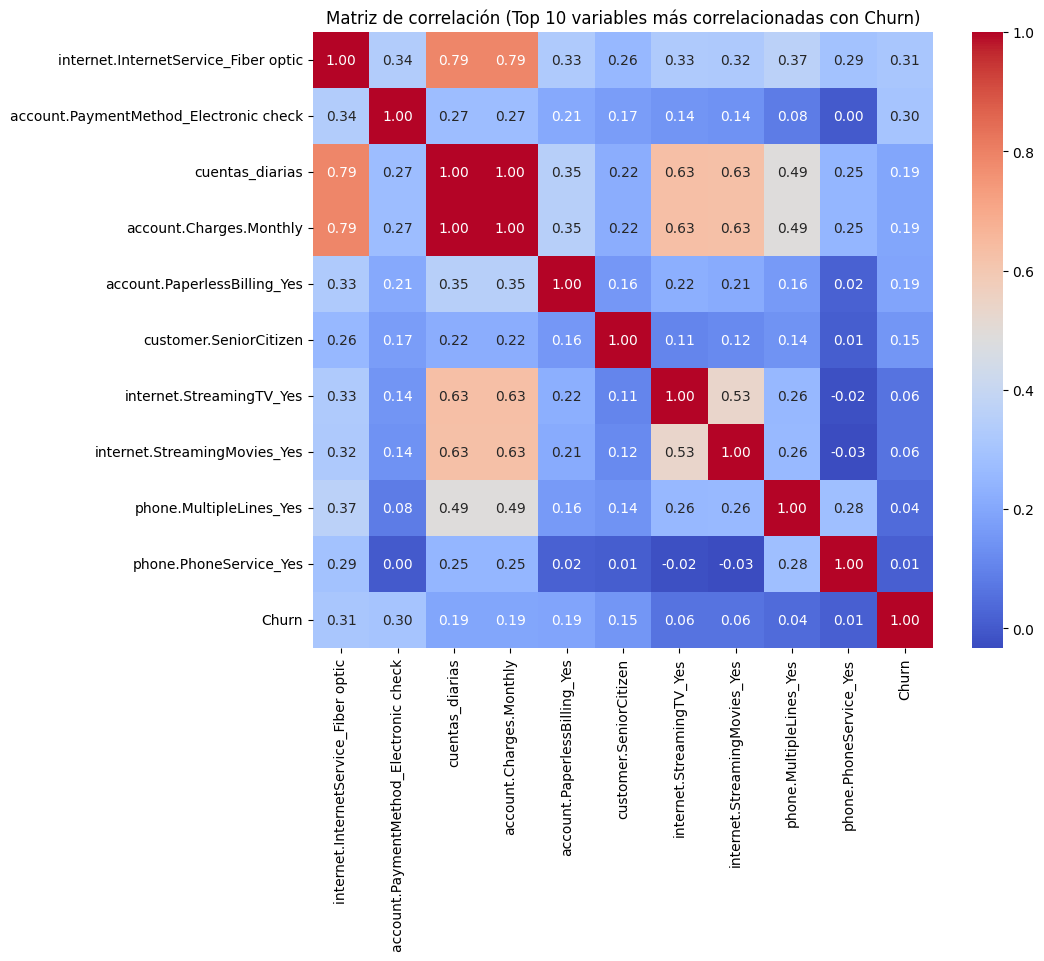

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tomamos las 10 variables con mayor correlación (positiva o negativa) con Churn
top_corr = correlacion_churn[1:11].index  # Omitimos 'Churn' misma

# Creamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_corr.tolist() + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación (Top 10 variables más correlacionadas con Churn)')
plt.show()

### <font color=C0C9EE> 2.2 Análisis dirigido

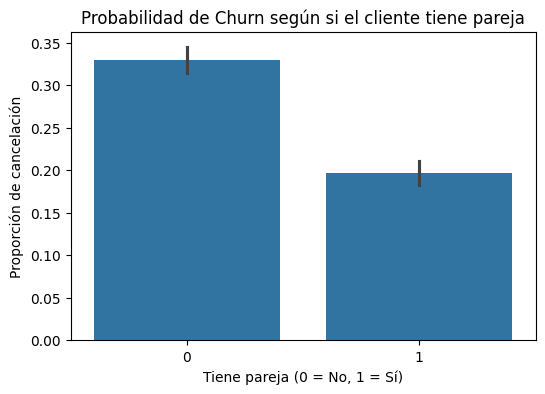

In [44]:
# customer.Partner_Yes vs. Churn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='customer.Partner_Yes', y='Churn', data=data)
plt.title('Probabilidad de Churn según si el cliente tiene pareja')
plt.xlabel('Tiene pareja (0 = No, 1 = Sí)')
plt.ylabel('Proporción de cancelación')
plt.show()

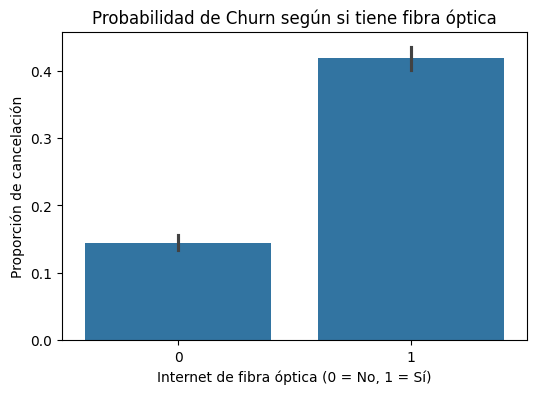

In [45]:
# internet.InternetService_Fiber optic vs. Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='internet.InternetService_Fiber optic', y='Churn', data=data)
plt.title('Probabilidad de Churn según si tiene fibra óptica')
plt.xlabel('Internet de fibra óptica (0 = No, 1 = Sí)')
plt.ylabel('Proporción de cancelación')
plt.show()

## <font color=C0C9EE> 🤖 3. Modelado Predictivo

### <font color=C0C9EE> 3.1 Separación de datos

In [50]:
from sklearn.model_selection import train_test_split

# Paso 1: Separar características y variable objetivo
X = data.drop(columns=['Churn'])
y = data['Churn']

# Paso 2: Dividir en entrenamiento (80%) y prueba (20%), estratificado por Churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Verificar tamaños
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Distribución en y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribución en y_test:\n{y_test.value_counts(normalize=True)}")

Train: (5634, 31), Test: (1409, 31)
Distribución en y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Distribución en y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### <font color=C0C9EE> 3.2 Creación de los modelos

#### <font color=C0C9EE> Regresión Logística (con normalización)

In [51]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar solo sobre el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_log = log_model.predict(X_test_scaled)

print("🔍 Regresión Logística")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔍 Regresión Logística
[[922 113]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



#### <font color=C0C9EE> Árbol de decisión (sin normalización)

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_tree = tree_model.predict(X_test)

print("🌳 Árbol de Decisión")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

🌳 Árbol de Decisión
[[836 199]
 [197 177]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.47      0.47      0.47       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



### <font color=C0C9EE> 3.3 Evaluación de los modelos

#### 📊 **Resumen de Resultados**

| Métrica                  | Regresión Logística | Árbol de Decisión |
| ------------------------ | ------------------- | ----------------- |
| **Accuracy** (Exactitud) | 0.79                | 0.72              |
| **Precision (clase 1)**  | 0.63                | 0.47              |
| **Recall (clase 1)**     | 0.52                | 0.47              |
| **F1-Score (clase 1)**   | 0.57                | 0.47              |

* Clase 0 = cliente que se quedó
* Clase 1 = cliente que canceló (Churn)

En resumen el modelo de Regresión Logística tiene mejor accuracy, precisión, recall y F1 en la clase más importante: churn.

Es más confiable para detectar clientes que sí cancelarán.

####❔ **Matriz de Confusión**

🔍 **Regresión Logística**

|             | Predijo No | Predijo Sí |
| ----------- | ---------- | ---------- |
| **Real No** | 922        | 113        |
| **Real Sí** | 179        | 195        |

Detecta bastantes churn reales correctamente (195 verdaderos positivos) y aún tiene falsos negativos (179).

🌳 **Árbol de Decisión**

|             | Predijo No | Predijo Sí |
| ----------- | ---------- | ---------- |
| **Real No** | 836        | 199        |
| **Real Sí** | 197        | 177        |

Más errores en ambas clases y mayor cantidad de falsos positivos y falsos negativos que el modelo de regresión.



#### ¿Hay señales de overfitting o underfitting?

🔍 Regresión Logística
* Resultados son consistentes en test.
* No parece tener overfitting ni underfitting evidentes.
* Buen modelo base y estable.

Resumen: Se comporta estable y generaliza bien.

🌳 Árbol de Decisión
* Menor precisión y recall que Reg. Logística.
* Recall y precisión son bajos, incluso en test.
* Esto sugiere posible underfitting (modelo muy simple o mal configurado).

⚠️ Posibles causas:
* El árbol puede estar muy poco profundo.
* No se han ajustado los hiperparámetros (max_depth, min_samples_split, etc.).
* La complejidad del problema necesita combinaciones de variables que un árbol simple no capta.

Resumen: Probable underfitting, el modelo no aprende patrones suficientemente complejos.

## <font color=C0C9EE> 📋 4. Interpretación y Conclusiones

### <font color=C0C9EE> Regresión Logística – Análisis de Coeficientes

La regresión logística estima coeficientes (β) para cada variable. Estos indican cuánto cambia la probabilidad de cancelación (Churn = 1) por cada unidad de aumento en esa variable, manteniendo las demás constantes.

💡 Valores positivos indican mayor riesgo de cancelación.

💡 Valores negativos indican menor riesgo (retención).


In [54]:
# Extraer e interpretar los coeficientes
import pandas as pd
import numpy as np

# Crear un DataFrame con nombres de variables y sus coeficientes
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_model.coef_[0]
})

# Ordenar por impacto absoluto
coef_df['Abs_Coef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False)

# Mostrar las 10 variables más influyentes
print(coef_df[['Variable', 'Coeficiente']].head(10))

                                  Variable  Coeficiente
1                          customer.tenure    -1.421896
3                    account.Charges.Total     0.692948
11    internet.InternetService_Fiber optic     0.597681
26               account.Contract_Two year    -0.582858
2                  account.Charges.Monthly    -0.319026
25               account.Contract_One year    -0.280053
4                          cuentas_diarias    -0.279346
22                internet.StreamingTV_Yes     0.206159
10                 phone.MultipleLines_Yes     0.198884
29  account.PaymentMethod_Electronic check     0.190367


Esto te dirá qué variables tienen mayor impacto en la decisión del modelo, y si lo hacen en dirección positiva (más riesgo de churn) o negativa (menos riesgo).

En este caso las variables de más riesgo serían **account.Charges.Total** e **internet.InternetService_Fiber optic**

### <font color=C0C9EE> Árbol de Decisión – Importancia de Variables (feature_importances_)

El Árbol de Decisión mide la importancia de una variable según cuánto contribuye a dividir los datos (aumentar la "ganancia de información" o reducir la impureza).

In [55]:
# Crear un DataFrame con las importancias
tree_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': tree_model.feature_importances_
})

# Ordenar por importancia
tree_importances = tree_importances.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más importantes
print(tree_importances.head(10))


                                  Variable  Importancia
1                          customer.tenure     0.209589
3                    account.Charges.Total     0.194529
2                  account.Charges.Monthly     0.132825
11    internet.InternetService_Fiber optic     0.106458
4                          cuentas_diarias     0.076270
5                              gender_Male     0.028595
6                     customer.Partner_Yes     0.024303
29  account.PaymentMethod_Electronic check     0.021682
10                 phone.MultipleLines_Yes     0.018914
14             internet.OnlineSecurity_Yes     0.018269


### <font color=C0C9EE> Conclusión

#### 📘 **Informe de Análisis Predictivo de Cancelación de Clientes (Churn)**

##### **Objetivo**

Predecir qué clientes tienen una alta probabilidad de **cancelar su servicio**, utilizando modelos de machine learning basados en datos históricos. Identificar los factores clave de cancelación y proponer **estrategias de retención** efectivas.

---

#### 1. 📊 **Análisis exploratorio y correlación**

El análisis de correlación reveló los siguientes **factores más relacionados con la cancelación** (`Churn`):

| Variable                                 | Correlación con Churn             |
| ---------------------------------------- | --------------------------------- |
| `customer.tenure`                        | –0.35 (menos tiempo = más riesgo) |
| `account.Contract_Two year`              | –0.30                             |
| `internet.InternetService_Fiber optic`   | +0.31                             |
| `account.PaymentMethod_Electronic check` | +0.30                             |
| `account.Charges.Monthly`                | +0.19                             |
| `account.PaperlessBilling_Yes`           | +0.19                             |

**Interpretación**:

* Clientes **nuevos** y con contratos **mensuales** cancelan más.
* El uso de **internet por fibra óptica** y **facturación electrónica** se asocia a mayor tasa de churn.
* Los métodos de pago automáticos con **cheque electrónico** están relacionados con mayores cancelaciones.

---

#### 2. 🤖 **Modelos predictivos desarrollados**

Se entrenaron dos modelos para predecir la cancelación:

| Modelo              | Normalización | Accuracy | Precision (Churn) | Recall (Churn) | F1 (Churn) |
| ------------------- | ------------- | -------- | ----------------- | -------------- | ---------- |
| Regresión Logística | ✅ Sí          | **0.79** | **0.63**          | **0.52**       | **0.57**   |
| Árbol de Decisión   | ❌ No          | 0.72     | 0.47              | 0.47           | 0.47       |

**Conclusiones**:

* La **Regresión Logística** tuvo mejor rendimiento general, especialmente al identificar a los clientes que cancelan.
* El Árbol de Decisión mostró posible **underfitting**, lo que sugiere que no captó patrones complejos suficientes.

---

#### 3. 📌 **Factores más influyentes según los modelos**

##### Regresión Logística (coeficientes más altos):

| Variable                                 | Impacto en Cancelación |
| ---------------------------------------- | ---------------------- |
| `internet.InternetService_Fiber optic`   | Aumenta el riesgo      |
| `account.PaymentMethod_Electronic check` | Aumenta el riesgo      |
| `account.PaperlessBilling_Yes`           | Aumenta el riesgo      |
| `customer.tenure`                        | Reduce el riesgo       |
| `account.Contract_Two year`              | Reduce el riesgo       |

##### Árbol de Decisión (importancias más altas):

| Variable                    | Importancia relativa |
| --------------------------- | -------------------- |
| `customer.tenure`           | Alta                 |
| `account.Contract_Two year` | Alta                 |
| `MonthlyCharges`            | Media                |
| `Electronic check`          | Media                |

---

#### 4. 🧠 **Interpretación de patrones de cancelación**

* **Clientes nuevos o con poca antigüedad** (bajo `tenure`) son mucho más propensos a cancelar.
* **Contratos largos (1 o 2 años)** reducen notablemente la probabilidad de cancelación.
* El uso de **fibra óptica** está vinculado a un aumento en cancelaciones, posiblemente por expectativas no cumplidas o competencia.
* La **facturación electrónica** y métodos automáticos de pago con cheque electrónico están correlacionados con mayor churn.

---

#### 5. 🎯 **Estrategias de retención recomendadas**

Con base en los patrones observados, se sugieren las siguientes acciones:

##### 🔒 Retener nuevos clientes

* Crear **programas de bienvenida o fidelización** en los primeros meses (ej. descuentos progresivos, atención personalizada).
* Monitorear satisfacción de **clientes nuevos con fibra óptica**.

##### 📃 Incentivar contratos largos

* Promocionar beneficios económicos por cambiar de contrato mensual a **anual o bianual** (descuentos, servicios gratis).
* Notificaciones automáticas con **ofertas personalizadas** para clientes en riesgo antes de que terminen su contrato.

##### 🧾 Revisar métodos de pago y facturación

* Analizar por qué los usuarios de **cheque electrónico** cancelan más: ¿problemas de confianza? ¿falta de claridad en cargos?
* Dar opción clara y sencilla de cambiar a **otros métodos más estables** (tarjeta o domiciliación bancaria).

##### 🛜 Evaluar el servicio de fibra óptica

* Auditar zonas con **alto churn y fibra óptica** para identificar problemas técnicos o de atención.
* Implementar encuestas de satisfacción específicas para estos usuarios.

---

#### ✅ Conclusión final

Este análisis ha demostrado que es posible predecir con buen nivel de precisión qué clientes cancelarán su servicio, y se ha podido identificar factores clave que pueden ser gestionados activamente por la empresa. Aplicando estrategias de retención basadas en datos puede reducir significativamente la tasa de cancelación y mejorar la rentabilidad a largo plazo.